In [1]:
# Performances of different approaches
    Evaluated Metrics:
        F1-Score
        Precision
        Recall
        Hamming Loss

    DistilBERT 
        F1-Score: 0.4558
        Precision: 0.6110
        Recall: 0.3854
        Hamming Loss: 0.1746 

     Improved DistilBERT 1
        F1-Score: 0.5816
        Precision: 0.5638
        Recall: 0.6094
        Hamming Loss: 0.2117

    Improved DistilBERT 2
        F1-Score: 0.6210
        Precision: 0.6282
        Recall: 0.6198
        Hamming Loss: 0.1770

     Logistic Regression with TF-IDF
        F1-Score: 0.4156
        Precision: 0.4324
        Recall: 0.4007
        Hamming: 0.2635

    Random Forest with TF-IDF
        F1-Score: 0.4576
        Precision: 0.6601
        Recall: 0.3618
        Hamming: 0.1811

    Improved Random Forest with TF-IDF
        F1-Score: 0.7294902128811895
        Precision: 0.7112005540387503
        Recall: 0.7514792899408284
        Hamming: 0.12681159420289856

    Naive Bayes with TF-IDF
        F1-Score: 0.11077206635265205
        Precision: 0.5447470817120622
        Recall: 0.0622568093385214
        Hamming: 0.21829710144927536

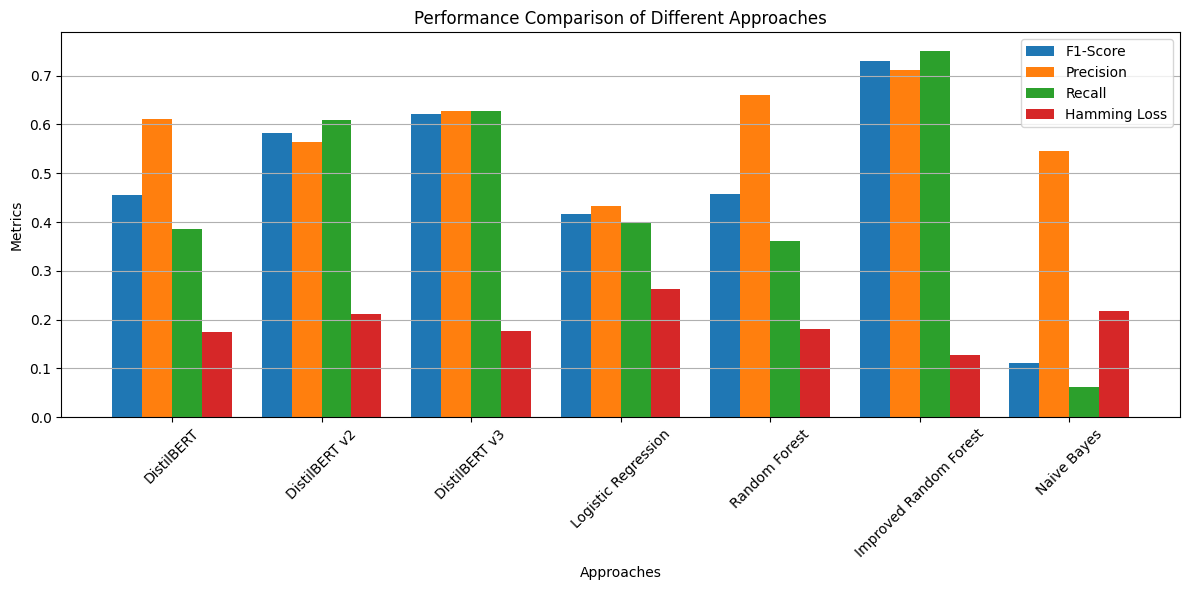

In [9]:
import matplotlib.pyplot as plt
import numpy as np

approaches = ['DistilBERT', 'DistilBERT v2', 'DistilBERT v3', 'Logistic Regression', 'Random Forest', 'Improved Random Forest', 'Naive Bayes']
f1_scores = [0.4558, 0.5816, 0.6210, 0.4156, 0.4576, 0.7294, 0.1108]
precision = [0.6110, 0.5638, 0.6282, 0.4324, 0.6601, 0.7112, 0.5447]
recall = [0.3854, 0.6094, 0.6282, 0.4007, 0.3618, 0.7514, 0.0623]
hamming = [0.1746, 0.2117, 0.1770, 0.2635, 0.1811, 0.1268, 0.2183]

x = np.arange(len(approaches))
width = 0.2

plt.figure(figsize=(12, 6))  

plt.bar(x - 1.5*width, f1_scores, width, label='F1-Score')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, hamming, width, label='Hamming Loss')

plt.xlabel('Approaches')
plt.ylabel('Metrics')
plt.title('Performance Comparison of Different Approaches')
plt.xticks(x, approaches, rotation=45)  
plt.legend()
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

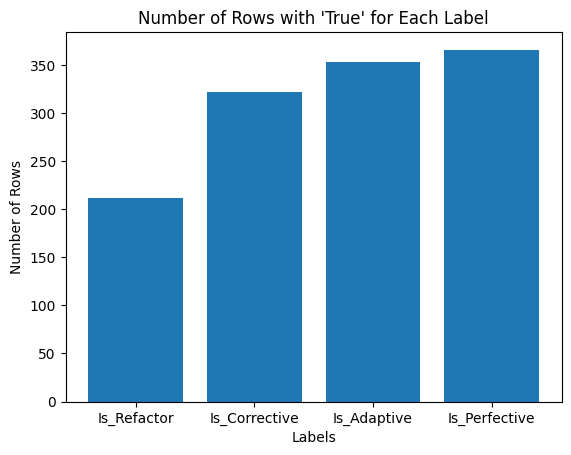

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('random_batch_18_nov_2020.csv')

labels = ["Is_Refactor", "Is_Corrective", "Is_Adaptive", "Is_Perfective"]
true_counts = {
    label: df[label].apply(lambda x: str(x).strip().lower() == 'true').sum()
    for label in labels
}

plt.bar(true_counts.keys(), true_counts.values())
plt.title("Number of Rows with 'True' for Each Label")
plt.xlabel("Labels")
plt.ylabel("Number of Rows")
plt.show()

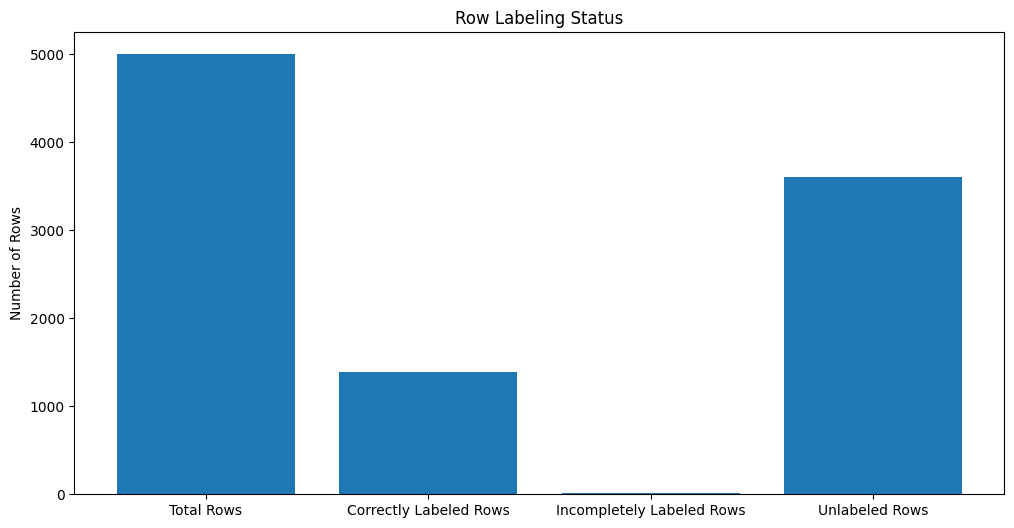

In [19]:
total_rows = len(df)
labeled_rows = df[labels].dropna().shape[0]
unlabeled_rows = df[labels].isna().all(axis=1).sum()
incompletely_labeled_rows = df[labels].isna().any(axis=1).sum() - unlabeled_rows

data = {
    "Total Rows": total_rows,
    "Correctly Labeled Rows": labeled_rows,
    "Incompletely Labeled Rows": incompletely_labeled_rows,
    "Unlabeled Rows": unlabeled_rows,
}

plt.figure(figsize=(12, 6)) 
plt.bar(data.keys(), data.values())
plt.title("Row Labeling Status")
plt.ylabel("Number of Rows")
plt.show()

In [17]:
Steps Taken on Model Building:
        Preprocessing:
            Removed unnecessary columns as explained in the each notebook file.
            Cleaned and tokenized the commit messages by removing special characters, lowercasing and lemmatizing

        Text Augmentation:
            Using WordNet as the source and #nlpaug's
            augmenter as the tool, we artificially extended the dataset 

        Class Balancing (DistilBERT):
            On the final iteration of the DistilBERT models we made, we used class balancing.
            We oversampled the minority classes.

        Threshold tuning:
            We optimized the threshold for getting the highest F1 score
            Using more optimized thresholds was crucial for performance

        Evaluating the models:
            F1, Precision, Recall and Hamming Loss metrics were recorded for all iterations
            Top features, Confusion matrices and precision-recall curves were plotted for all iterations

In [19]:
    Findings
        Threshold optimization and text augmentation has a large positive impact on performance
        Iterations using DistilBERT had very long training times despite not improving accuracy too much compared to simpler models.
        We could not come close enough to the F1 score of 87% in the original paper using DistilBERT.
        It shows that there is room for improvement.
        On the other hand, using the Random Forest and combining it with text augmentation and threshold optimization gave us the respectable F1 Score
        of 73%